In [14]:
from newspaper import Article
import requests
import re
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk

In [25]:
r = requests.get(url = 'https://abcnews.go.com/xmlLatestStories')
soup = BeautifulSoup(r.content,'html.parser')
r1 = requests.get(url = 'https://www.foxnews.com/sitemap.xml?type=news')
soup1 = BeautifulSoup(r1.content,'html.parser')

In [26]:
abc = [i for i in soup.select('loc')]
abc = [re.sub('<loc>|</loc>','',str(i)) for i in abc]
fox = [i for i in soup1.select('loc')]
fox = [re.sub('<loc>|</loc>','',str(i)) for i in fox]

In [34]:
def preprocess(data):
    result = []
    nlp = spacy.load("en_core_web_sm",exclude=["parser"])
    nlp.enable_pipe("senter")
    lemmatizer = nlp.get_pipe("lemmatizer")
    stopwords = nlp.Defaults.stop_words
    for i in data:
        content = re.sub('\n','',i)
        doc = nlp(content)
        word = [token.text for token in doc]
        word = [i for i in word if i not in stopwords]
        result+=word
    return result

In [28]:
# keep this one don't rerun the cell
news=[]
for i in abc[:100]:
    try:
        article = Article(i)
        article.download()
        article.parse()
        news+=[article.text]
    except:
        pass

In [21]:
news1,news2=[],[]
for i in abc[:100]:
    try:
        article = Article(i)
        article.download()
        article.parse()
        news1+=[article.text]
    except:
        pass
for i in fox[:100]:
    try:
        article = Article(i)
        article.download()
        article.parse()
        news2+=[article.text]
    except:
        pass

In [43]:
abcnews=news+news1
file = open('abcdata.text','w')
file.writelines(abcnews[:100])
file.close()

file = open('foxdata.text','w')
file.writelines(news2)
file.close()

abctext = preprocess(abcnews[:100])
foxtext = preprocess(news2)

In [44]:
tok,typ,vob=[],[],[]
for i in range(len(abctext)):
    if abctext[i] not in vob:
        vob+=[abctext[i]]
    tok+=[i]
    typ+=[len(vob)]
    
tok1,typ1,vob1=[],[],[]
for i in range(len(foxtext)):
    if foxtext[i] not in vob1:
        vob1+=[foxtext[i]]
    tok1+=[i]
    typ1+=[len(vob1)]   

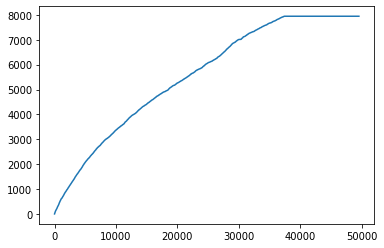

In [45]:
plt.plot(tok,typ); # for abc news

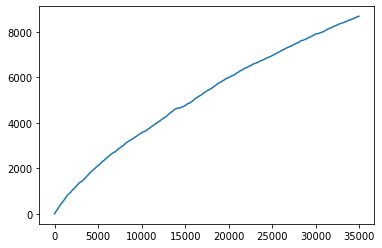

In [46]:
plt.plot(tok1,typ1); # for fox news

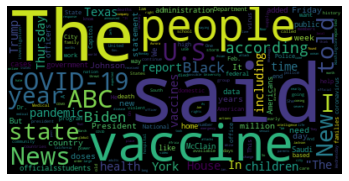

In [47]:
# For ABC wordcloud
abcfreq = nltk.FreqDist(i for i in abctext if re.search('[a-zA-Z]', i) != None)
wc = WordCloud()
wc.generate_from_frequencies((dict(abcfreq)))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

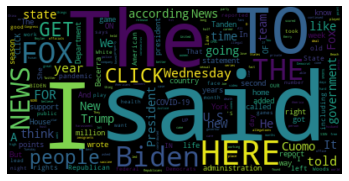

In [48]:
# For FOX wordcloud
foxfreq = nltk.FreqDist(i for i in foxtext if re.search('[a-zA-Z]', i) != None)
wc = WordCloud()
wc.generate_from_frequencies((dict(foxfreq)))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()